# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Azanti Zuhriyani]
- **Email:** [azanti.zuhriyani31@gmail.com]
- **ID Dicoding:** [MC001D5X0411]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren waktu pengiriman (delivery time) dari tanggal pembelian hingga tanggal diterima oleh pelanggan pada setiap kuartal selama 2017 dan 2018?
- Pertanyaan 2 :  Kota atau provinsi mana saja yang mengalami keterlambatan pengiriman paling banyak pada tahun 2018 dibandingkan estimasi
- Pertanyaan 3 : Bagaimana kontribusi pendapatan dari masing-masing kategori produk setiap semester sejak 2017 hingga akhir 2018?
- Pertanyaan 4 : Apakah terdapat perbedaan waktu persetujuan pesanan antar kategori produk tertentu selama peak season (Nov - Des) dibandingkan bulan biasa?
- Pertanyaan 5 : Siapa saja top 10 seller berdasarkan total penjualan selama 2018, dan bagaimana tren penjualannya setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd
print(gpd.__version__)

1.0.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Customer

In [5]:
cust = '/content/drive/My Drive/Data/customers_dataset.csv'
df1 = pd.read_csv(cust)
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Data Orders

In [6]:
order = '/content/drive/My Drive/Data/orders_dataset.csv'
df2 = pd.read_csv(order)
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Data Order Items

In [7]:
order_item = '/content/drive/My Drive/Data/order_items_dataset.csv'
df3 = pd.read_csv(order_item)
df3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Data Product Category Name Translation

In [8]:
product_category = '/content/drive/My Drive/Data/product_category_name_translation.csv'
df4 = pd.read_csv(product_category)
df4.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Data Products

In [9]:
product = '/content/drive/My Drive/Data/products_dataset.csv'
df5 = pd.read_csv(product)
df5.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Data Sellers

In [10]:
seller = '/content/drive/My Drive/Data/sellers_dataset.csv'
df6 = pd.read_csv(seller)
df6.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Data Geolocation

In [11]:
location = '/content/drive/My Drive/Data/geolocation_dataset.csv'
df7 = pd.read_csv(location)
df7.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Mrnggabungkan Data

In [12]:
order_order_item_product = pd.merge(
    df2,
    df3,
    on='order_id',
    how='inner'
)

order_order_item_product = pd.merge(
    order_order_item_product,
    df5,
    on='product_id',
    how='inner'
)

customer_order_item_product = pd.merge(
    df1,
    order_order_item_product,
    on='customer_id',
    how='inner'
)

all_data = pd.merge(
    customer_order_item_product,
    df6,
    on='seller_id',
    how='inner'
)

all_data = pd.merge(
    all_data,
    df4,
    on='product_category_name',
    how='left'  # Use left join to keep all data from all_data
)


# merge with customer location:
customer_location = df7[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].drop_duplicates(subset=['geolocation_zip_code_prefix']).rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})
all_data = pd.merge(
    all_data,
    customer_location,
    on='customer_zip_code_prefix',
    how='left'
)

# merge with seller location:
seller_location = df7[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].drop_duplicates(subset=['geolocation_zip_code_prefix']).rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix', 'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'})
all_data = pd.merge(
    all_data,
    seller_location,
    on='seller_zip_code_prefix',
    how='left'
)

all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_lat,geolocation_lng,seller_lat,seller_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-20.509897,-47.397866,-23.482623,-46.374490
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,15.0,40.0,88303,itajai,SC,housewares,-23.726853,-46.545746,-26.912429,-48.677381
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,52.0,17.0,8577,itaquaquecetuba,SP,office_furniture,-23.527788,-46.660310,-23.482623,-46.374490
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,51.0,28.0,8577,itaquaquecetuba,SP,office_furniture,-23.496930,-46.185352,-23.482623,-46.374490
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,14940,ibitinga,SP,home_confort,-22.987222,-47.151073,-21.766477,-48.831547


**Insight:**
- Dataset yang akan digunakan sudah dikumpulkan satu per satu
- Terdapat 7 datasets diantaranya
1. Data Customers
2. Data Orders
3. Data Order Items
4. Data Product Category Name Translation
5. Data Products
6. Data Sellers
7. Data Geolocation
- Semua dataset sudah digabung menjadi satu dengan nama ``` all_data ```




### Assessing Data

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [14]:
all_data.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194


In [15]:
all_data.duplicated().sum()

np.int64(0)

In [16]:
all_data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng,seller_lat,seller_lng
count,112650.000000,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,112650.000000,112348.000000,112348.000000,112397.000000,112397.000000
mean,35119.309090,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,24439.170431,-21.235315,-46.202639,-22.800558,-47.235919
std,29866.120801,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,27596.030909,5.580937,4.046648,2.697063,2.341211
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-36.605374,-72.666706,-36.605374,-67.809656
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.590818,-48.111461,-23.610305,-48.831547
50%,24340.000000,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13568.000000,-22.930927,-46.633346,-23.422313,-46.747050
75%,59028.750000,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27930.000000,-20.189088,-43.642049,-21.766477,-46.518082
max,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,42.184003,-8.577855,-2.546079,-34.847856


**Insight:**
- Terdapat beberapa peubah yang mengandung missing value, diantara nya
1. ``` order_approved_at ``` = 15
2. ``` order_delivered_carrier_date ``` = 1194
3. ``` order_delivered_customer_date ``` = 2454
4. ``` product_category_name ``` = 1603
5. ``` product_name_length ``` = 1603
6. ``` product_description_length ``` = 1603
7.  ``` product_photos_qty ``` = 1603
8.  ``` product_weight_g ``` = 18
9. ``` product_length_cm ``` = 18
10. ``` product_height_cm ``` = 18
11. ``` product_width_cm ``` = 18
12. ``` product_category_name_english ``` = 1627
13. ``` geolocation_lat ``` = 302
14. ``` geolocation_lng ``` = 302
15. ``` seller_lat ``` = 253
16. ``` seller_lng ``` = 253

### Cleaning Data

Penanganan Missing Value

In [17]:
date_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
for col in date_cols:
    all_data[col] = all_data[col].fillna(method='ffill')

product_info_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english']
for col in product_info_cols:
    mode_value = all_data[col].mode()[0]
    all_data[col] = all_data[col].fillna(mode_value)

location_cols = ['geolocation_lat', 'geolocation_lng', 'seller_lat', 'seller_lng']
for col in location_cols:
    mean_value = all_data[col].mean()
    all_data[col] = all_data[col].fillna(mean_value)

print(all_data.isna().sum())

/tmp/ipython-input-17-1780039923.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data[col] = all_data[col].fillna(method='ffill')


customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state        

Mengubah tipe data menjadi datetime

In [18]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]
for col in date_cols:
    all_data[col] = pd.to_datetime(all_data[col], errors='coerce')

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112650 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112650 non-null  datetime64[ns]
 10  order_delivered_customer_date  112650 non-null  datetime64[ns]
 11  

**Insight:**
- Mengisi missing value pada kolom tanggal dengan forward fill (menggunakan nilai sebelumnya)
- Mengisi missing value pada kolom informasi produk dengan nilai modus
- Mengisi missing value pada kolom geolokasi dengan nilai rata-rata


## Exploratory Data Analysis (EDA)

In [20]:
all_data.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng,seller_lat,seller_lng
count,112650.000000,112650,112650,112650,112650,112650,112650.000000,112650,112650.000000,112650.000000,...,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,35119.309090,2018-01-01 00:09:48.464376320,2018-01-01 11:42:45.202902784,2018-01-05 01:03:44.143444480,2018-01-14 14:06:32.237132288,2018-01-24 20:12:15.531291392,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320,...,2.192499,2093.369463,30.151407,16.592712,22.996067,24439.170431,-21.235315,-46.202639,-22.800558,-47.235919
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,2016-09-19 00:15:34,0.850000,0.000000,...,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-36.605374,-72.666706,-36.605374,-67.809656
25%,11310.000000,2017-09-13 19:17:04,2017-09-14 03:27:45.500000,2017-09-18 19:16:15.750000128,2017-09-26 19:23:12,2017-10-05 00:00:00,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000,...,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.589946,-48.105099,-23.609026,-48.831547
50%,24340.000000,2018-01-19 23:02:16,2018-01-20 12:51:33.500000,2018-01-24 18:20:17,2018-02-02 21:01:49.500000,2018-02-16 00:00:00,1.000000,2018-01-26 13:59:35,74.990000,16.260000,...,1.000000,700.000000,25.000000,13.000000,20.000000,13568.000000,-22.929128,-46.632180,-23.420739,-46.755211
75%,59028.750000,2018-05-04 17:30:36.750000128,2018-05-05 03:10:13.500000,2018-05-08 13:17:00,2018-05-15 20:44:34.500000,2018-05-28 00:00:00,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000,...,3.000000,1800.000000,38.000000,20.000000,30.000000,27930.000000,-20.199173,-43.659629,-21.766477,-46.518082
max,99990.000000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,...,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,42.184003,-8.577855,-2.546079,-34.847856
std,29866.120801,NaN,NaN,NaN,NaN,NaN,0.705124,NaN,183.633928,15.806405,...,1.715141,3751.373501,16.153149,13.442667,11.706394,27596.030909,5.573451,4.041220,2.694033,2.338580


### Explore Distribusi Waktu Transaksi

In [21]:
print('Rentang tanggal data: dari', all_data['order_purchase_timestamp'].min(), 'sampai', all_data['order_purchase_timestamp'].max())

Rentang tanggal data: dari 2016-09-04 21:15:19 sampai 2018-09-03 09:06:57


Transaksi Per Bulan

In [22]:
all_data['month_year'] = all_data['order_purchase_timestamp'].dt.to_period('M')
monthwise_transactions = all_data['month_year'].value_counts().sort_index()
print(monthwise_transactions)

month_year
2016-09       6
2016-10     363
2016-12       1
2017-01     955
2017-02    1951
2017-03    3000
2017-04    2684
2017-05    4136
2017-06    3583
2017-07    4519
2017-08    4910
2017-09    4831
2017-10    5322
2017-11    8665
2017-12    6308
2018-01    8208
2018-02    7672
2018-03    8217
2018-04    7975
2018-05    7925
2018-06    7078
2018-07    7092
2018-08    7248
2018-09       1
Freq: M, Name: count, dtype: int64


Transaksi Per Hari

In [24]:
all_data['day_of_week'] = all_data['order_purchase_timestamp'].dt.day_name()
daywise_transactions = all_data['day_of_week'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
print(daywise_transactions)


day_of_week
Monday       18393
Tuesday      18237
Wednesday    17600
Thursday     16797
Friday       16039
Saturday     12168
Sunday       13416
Name: count, dtype: int64


Transaksi Per Jam

In [26]:
hourly_transactions = all_data['order_purchase_timestamp'].dt.hour.value_counts().sort_index()
print(hourly_transactions)

order_purchase_timestamp
0     2717
1     1289
2      584
3      314
4      244
5      218
6      556
7     1377
8     3377
9     5449
10    7034
11    7432
12    6819
13    7403
14    7565
15    7370
16    7653
17    7010
18    6550
19    6716
20    6875
21    6920
22    6541
23    4637
Name: count, dtype: int64


### Explore Product

In [42]:
all_data['semester'] = all_data['order_purchase_timestamp'].dt.to_period('6M')
all_data['total_revenue'] = all_data['price'] + all_data['freight_value']
revenue_per_category = all_data.groupby(['semester', 'product_category_name_english'])['total_revenue'].sum().reset_index()

# 1. Menampilkan output tabel (15 kategori teratas per semester)
print("Revenue per Kategori Produk per Semester (Top 15 per semester):")
for semester in revenue_per_category['semester'].unique():
    print(f"\nSemester: {semester}")
    print(revenue_per_category[revenue_per_category['semester'] == semester]
          .sort_values('total_revenue', ascending=False)
          .head(15)
          .to_string(index=False))

Revenue per Kategori Produk per Semester (Top 15 per semester):

Semester: 2016-09
semester product_category_name_english  total_revenue
 2016-09                 health_beauty         143.46
 2016-09               furniture_decor         136.23
 2016-09                     telephony          75.06

Semester: 2016-10
semester product_category_name_english  total_revenue
 2016-10               furniture_decor        7052.28
 2016-10                     perfumery        6223.84
 2016-10                 health_beauty        5493.38
 2016-10                          toys        4986.08
 2016-10                consoles_games        4089.42
 2016-10                sports_leisure        3927.11
 2016-10                 watches_gifts        3468.04
 2016-10                          auto        2257.56
 2016-10              air_conditioning        1904.91
 2016-10                          baby        1819.08
 2016-10         computers_accessories        1740.09
 2016-10              office_furni

### Explore pengiriman

In [36]:
all_data['delivery_days'] = (all_data['order_delivered_customer_date'] - all_data['order_purchase_timestamp']).dt.days
delivery_trend = all_data.copy()
delivery_trend['quarter'] = delivery_trend['order_purchase_timestamp'].dt.to_period('Q')
delivery_by_quarter = delivery_trend.groupby('quarter')['delivery_days'].mean().reset_index()
print("Rata-rata Hari Pengiriman per Kuartal:")
print(delivery_by_quarter.to_string(index=False))

Rata-rata Hari Pengiriman per Kuartal:
quarter  delivery_days
 2016Q3     263.000000
 2016Q4      76.348901
 2017Q1      24.704707
 2017Q2      20.019417
 2017Q3      14.011360
 2017Q4      14.536093
 2018Q1      14.017471
 2018Q2       8.540561
 2018Q3       4.545499


In [39]:
late_orders = all_data[
    (all_data['order_delivered_customer_date'] > all_data['order_estimated_delivery_date']) &
    (all_data['order_purchase_timestamp'].dt.year == 2018)
]

late_by_city = late_orders['customer_city'].value_counts().reset_index()
late_by_city.columns = ['city', 'late_orders']
late_by_state = late_orders['customer_state'].value_counts().reset_index()
late_by_state.columns = ['state', 'late_orders']
print("Pesanan Terlambat Berdasarkan Kota:")
print(late_by_city.head(10).to_string(index=False))
print("\nPesanan Terlambat Berdasarkan Provinsi:")
print(late_by_state.head(10).to_string(index=False))

Pesanan Terlambat Berdasarkan Kota:
          city  late_orders
     sao paulo          781
rio de janeiro          517
belo horizonte          153
      salvador          146
      brasilia          115
  porto alegre          104
      campinas           94
     fortaleza           90
       niteroi           76
       goiania           62

Pesanan Terlambat Berdasarkan Provinsi:
state  late_orders
   SP         1882
   RJ         1129
   MG          532
   BA          330
   RS          245
   SC          228
   PR          194
   ES          186
   CE          165
   GO          115


### Explore Pesanan

In [45]:
all_data['approval_time'] = (all_data['order_approved_at'] - all_data['order_purchase_timestamp']).dt.total_seconds() / 3600
all_data['month'] = all_data['order_purchase_timestamp'].dt.month
all_data['is_peak'] = all_data['month'].isin([11, 12])
all_data['is_peak'] = all_data['is_peak'].replace({True: "Peak (Nov-Dec)", False: "Non-Peak"})
approval_comparison = all_data.groupby('is_peak')['approval_time'].mean().reset_index()
print("Rata-rata Waktu Persetujuan Pesanan:")
print(approval_comparison.to_string(index=False))

Rata-rata Waktu Persetujuan Pesanan:
       is_peak  approval_time
      Non-Peak      11.618039
Peak (Nov-Dec)      11.099365


### Explore Seller

In [48]:
seller_2018 = all_data[all_data['order_purchase_timestamp'].dt.year == 2018].copy()
seller_2018['revenue'] = seller_2018['price']
top_sellers = seller_2018.groupby('seller_id')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()
seller_2018['month'] = seller_2018['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = seller_2018[seller_2018['seller_id'].isin(top_sellers['seller_id'])]
monthly_trend = monthly_sales.groupby(['seller_id', 'month'])['revenue'].sum().reset_index()
print(monthly_trend)

                           seller_id    month   revenue
0   1025f0e2d44d7041d6cf58b6550e0bfa  2018-01   8808.70
1   1025f0e2d44d7041d6cf58b6550e0bfa  2018-02   4256.80
2   1025f0e2d44d7041d6cf58b6550e0bfa  2018-03  12553.67
3   1025f0e2d44d7041d6cf58b6550e0bfa  2018-04  15110.65
4   1025f0e2d44d7041d6cf58b6550e0bfa  2018-05  17566.96
..                               ...      ...       ...
74  fa1c13f2614d7b5c4749cbc52fecda94  2018-04  11224.98
75  fa1c13f2614d7b5c4749cbc52fecda94  2018-05  12180.29
76  fa1c13f2614d7b5c4749cbc52fecda94  2018-06  12755.54
77  fa1c13f2614d7b5c4749cbc52fecda94  2018-07  12179.56
78  fa1c13f2614d7b5c4749cbc52fecda94  2018-08   8714.80

[79 rows x 3 columns]


In [50]:
total_revenue = monthly_trend.groupby('seller_id')['revenue'].sum().reset_index()
top_10_sellers = total_revenue.sort_values(by='revenue', ascending=False).head(10)
print(top_10_sellers)

                          seller_id    revenue
1  4869f7a5dfa277a7dca6462dcf3b52b2  138414.60
6  955fee9216a65b617aa5c0531780ce60  117340.86
5  7d13fca15225358621be4086e1eb0964  113628.97
0  1025f0e2d44d7041d6cf58b6550e0bfa  105196.71
9  fa1c13f2614d7b5c4749cbc52fecda94   95013.42
4  7c67e1448b00f6e969d365cea6b010ab   92746.90
8  da8622b14eb17ae2831f4ac5b9dab84a   89450.47
2  4a3ca9315b744ce9f8e9374361493884   72888.15
3  6560211a19b47992c3666cc44a7e94c0   67823.93
7  a1043bafd471dff536d0c462352beb48   61187.05


**Insight:**
- Melakukan eksplorasi statistik deskriptif
- Mendapatkan distribusi transaksi dalam rentang bulan, hari, dan jam
- Menganalisis Revenue per Kategori Produk per Semester (Top 15 per semester)
- Menganalisis Rata-rata Hari Pengiriman per Kuartal
- Mengidentifikasi Keterlambatan paket dalam provinsi dan kota
- Menganalisis Rata-rata Waktu Persetujuan Pesanan berdasarkan season (peak dan non-peak)
- Mengidentifikasi seller berdasarkan revenue

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren waktu pengiriman (delivery time) dari tanggal pembelian hingga tanggal diterima oleh pelanggan pada setiap kuartal selama 2017 dan 2018?


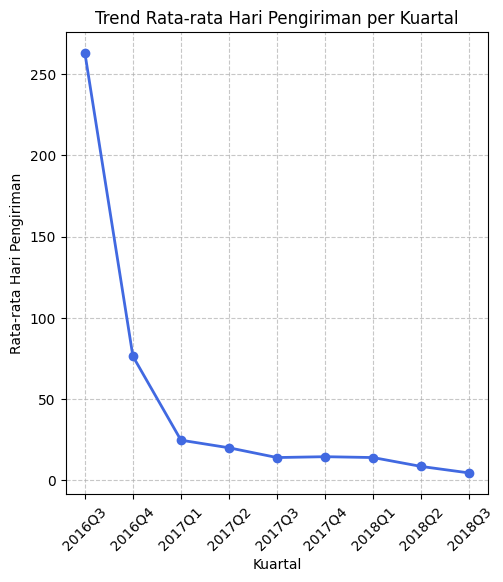

In [37]:
all_data['delivery_days'] = (all_data['order_delivered_customer_date'] - all_data['order_purchase_timestamp']).dt.days
delivery_trend = all_data.copy()
delivery_trend['quarter'] = delivery_trend['order_purchase_timestamp'].dt.to_period('Q')
delivery_by_quarter = delivery_trend.groupby('quarter')['delivery_days'].mean().reset_index()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(delivery_by_quarter['quarter'].astype(str),
         delivery_by_quarter['delivery_days'],
         marker='o',
         color='royalblue',
         linewidth=2)
plt.title('Trend Rata-rata Hari Pengiriman per Kuartal')
plt.xlabel('Kuartal')
plt.ylabel('Rata-rata Hari Pengiriman')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)


/tmp/ipython-input-38-212304012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter',


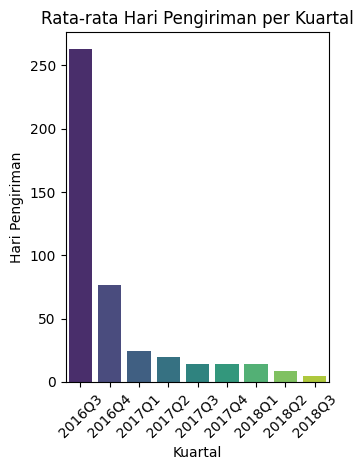

In [38]:
plt.subplot(1, 2, 2)
sns.barplot(x='quarter',
            y='delivery_days',
            data=delivery_by_quarter,
            palette='viridis')
plt.title('Rata-rata Hari Pengiriman per Kuartal')
plt.xlabel('Kuartal')
plt.ylabel('Hari Pengiriman')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Kota atau provinsi mana saja yang mengalami keterlambatan pengiriman paling banyak pada tahun 2018 dibandingkan estimasi


/tmp/ipython-input-40-2468992568.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='late_orders', y='city', data=late_by_city.head(10), palette='Blues_d')


Text(0, 0.5, 'Kota')

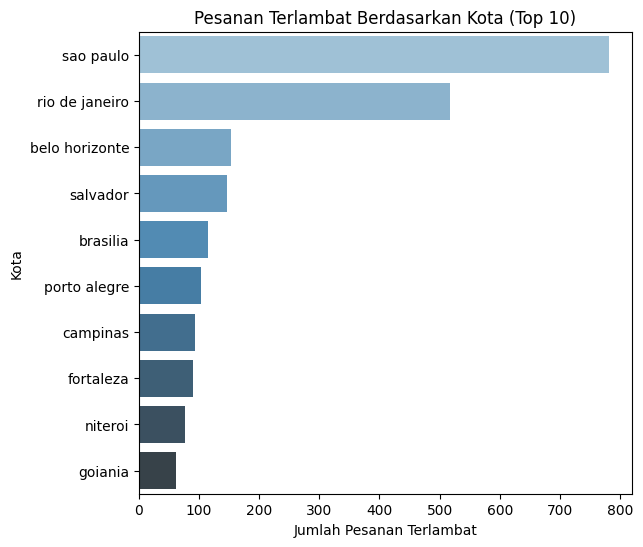

In [40]:
# Filter pesanan terlambat
late_orders = all_data[
    (all_data['order_delivered_customer_date'] > all_data['order_estimated_delivery_date']) &
    (all_data['order_purchase_timestamp'].dt.year == 2018)
]

late_by_city = late_orders['customer_city'].value_counts().reset_index()
late_by_city.columns = ['city', 'late_orders']
late_by_state = late_orders['customer_state'].value_counts().reset_index()
late_by_state.columns = ['state', 'late_orders']
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='late_orders', y='city', data=late_by_city.head(10), palette='Blues_d')
plt.title('Pesanan Terlambat Berdasarkan Kota (Top 10)')
plt.xlabel('Jumlah Pesanan Terlambat')
plt.ylabel('Kota')

/tmp/ipython-input-41-280026163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='late_orders', y='state', data=late_by_state.head(10), palette='Oranges_d')


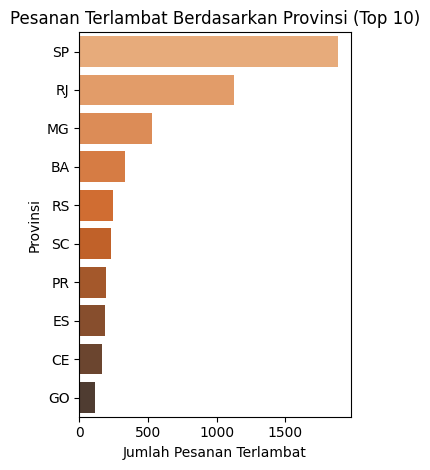

In [41]:
plt.subplot(1, 2, 2)
sns.barplot(x='late_orders', y='state', data=late_by_state.head(10), palette='Oranges_d')
plt.title('Pesanan Terlambat Berdasarkan Provinsi (Top 10)')
plt.xlabel('Jumlah Pesanan Terlambat')
plt.ylabel('Provinsi')

plt.tight_layout()
plt.show()


### Pertanyaan 3 : Bagaimana kontribusi pendapatan dari masing-masing kategori produk setiap semester sejak 2017 hingga akhir 2018?


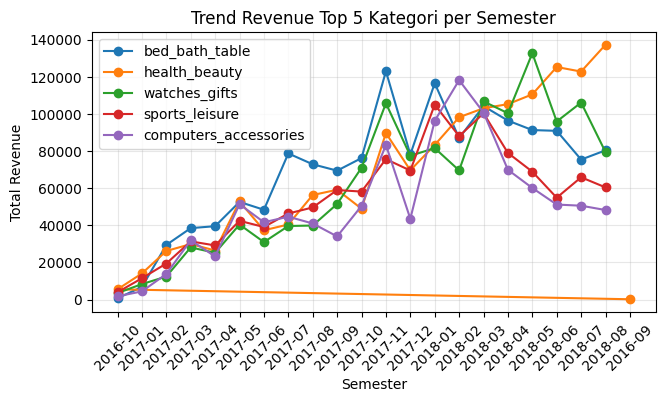

In [43]:
all_data['semester'] = all_data['order_purchase_timestamp'].dt.to_period('6M')
all_data['total_revenue'] = all_data['price'] + all_data['freight_value']
revenue_per_category = all_data.groupby(['semester', 'product_category_name_english'])['total_revenue'].sum().reset_index()
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
top_categories = revenue_per_category.groupby('product_category_name_english')['total_revenue'].sum().nlargest(5).index
for category in top_categories:
    subset = revenue_per_category[revenue_per_category['product_category_name_english'] == category]
    plt.plot(subset['semester'].astype(str), subset['total_revenue'], 'o-', label=category)
plt.title('Trend Revenue Top 5 Kategori per Semester')
plt.xlabel('Semester')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

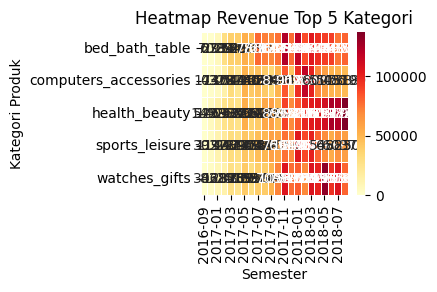

In [44]:
plt.subplot(2, 2, 2)
top5_categories = revenue_per_category.groupby('product_category_name_english')['total_revenue'].sum().nlargest(5).index
heatmap_data = revenue_per_category[revenue_per_category['product_category_name_english'].isin(top5_categories)]

heatmap_data = heatmap_data.pivot_table(index='product_category_name_english',
                                         columns='semester',
                                         values='total_revenue',
                                         fill_value=0)  # Mengisi nilai kosong dengan 0

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap Revenue Top 5 Kategori')
plt.xlabel('Semester')
plt.ylabel('Kategori Produk')

plt.tight_layout()
plt.show()


### Pertanyaan 4 : Apakah terdapat perbedaan waktu persetujuan pesanan antar kategori produk tertentu selama peak season (Nov - Des) dibandingkan bulan biasa?


/tmp/ipython-input-46-4175652979.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y='approval_time', data=all_data,


Text(0, 0.5, 'Waktu Persetujuan (Jam)')

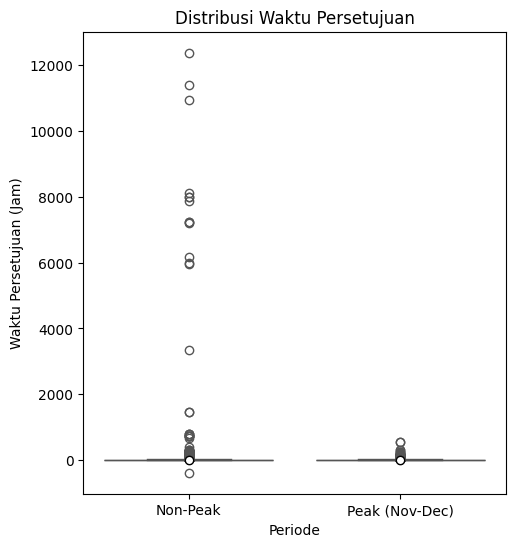

In [46]:
all_data['approval_time'] = (all_data['order_approved_at'] - all_data['order_purchase_timestamp']).dt.total_seconds() / 3600
all_data['month'] = all_data['order_purchase_timestamp'].dt.month
all_data['is_peak'] = all_data['month'].isin([11, 12])
all_data['is_peak'] = all_data['is_peak'].replace({True: "Peak (Nov-Dec)", False: "Non-Peak"})
approval_comparison = all_data.groupby('is_peak')['approval_time'].mean().reset_index()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_peak', y='approval_time', data=all_data,
            showmeans=True,
            meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'},
            palette={"Peak (Nov-Dec)": '#FF6B6B', "Non-Peak": '#4ECDC4'})
plt.title('Distribusi Waktu Persetujuan')
plt.xlabel('Periode')
plt.ylabel('Waktu Persetujuan (Jam)')

/tmp/ipython-input-47-3219334858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_peak', y='approval_time', data=approval_comparison,


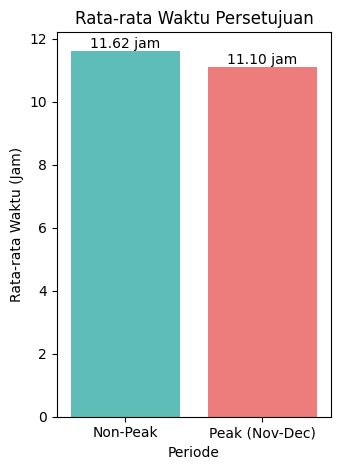

In [47]:
plt.subplot(1, 2, 2)
sns.barplot(x='is_peak', y='approval_time', data=approval_comparison,
            palette={"Peak (Nov-Dec)": '#FF6B6B', "Non-Peak": '#4ECDC4'},
            errorbar=None)
plt.title('Rata-rata Waktu Persetujuan')
plt.xlabel('Periode')
plt.ylabel('Rata-rata Waktu (Jam)')

# Tambahkan nilai diatas bar
for index, row in approval_comparison.iterrows():
    plt.text(index, row['approval_time'], f"{row['approval_time']:.2f} jam",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 5 : Siapa saja top 10 seller berdasarkan total penjualan selama 2018, dan bagaimana tren penjualannya setiap bulannya?

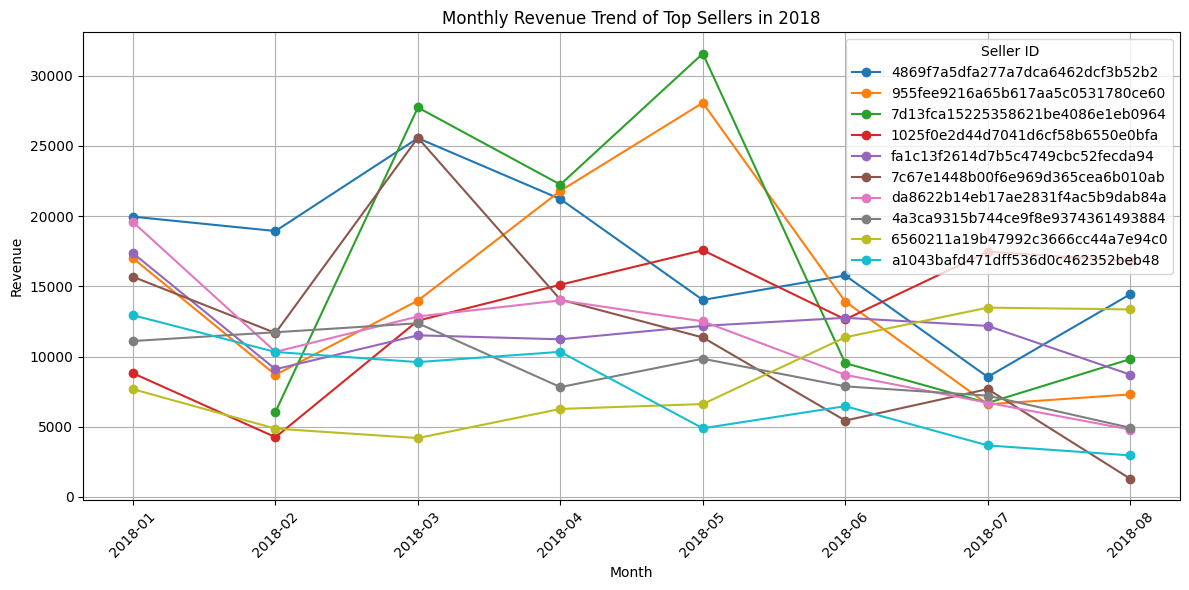

In [49]:
seller_2018 = all_data[all_data['order_purchase_timestamp'].dt.year == 2018].copy()
seller_2018['revenue'] = seller_2018['price']
top_sellers = seller_2018.groupby('seller_id')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()
seller_2018['month'] = seller_2018['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = seller_2018[seller_2018['seller_id'].isin(top_sellers['seller_id'])]
monthly_trend = monthly_sales.groupby(['seller_id', 'month'])['revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
for seller in top_sellers['seller_id']:
    seller_data = monthly_trend[monthly_trend['seller_id'] == seller]
    plt.plot(seller_data['month'].astype(str), seller_data['revenue'], marker='o', label=seller)

plt.title('Monthly Revenue Trend of Top Sellers in 2018')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Seller ID')
plt.grid()
plt.tight_layout()
plt.show()


**Insight:**
- Pertanyaan 1 :

Selama periode 2017 hingga 2018, terjadi penurunan signifikan dalam rata-rata waktu pengiriman dari pembeli hingga produk diterima. Pada awal 2017, rata-rata waktu pengiriman mencapai lebih dari 24 hari per transaksi. Namun, tren ini terus menurun secara konsisten tiap kuartal hingga mencapai rata-rata hanya 4,5 hari pada kuartal ketiga 2018.

Penurunan ini mencerminkan adanya peningkatan efisiensi sistem logistik, baik dari sisi internal platform maupun kerja sama dengan jasa pengiriman. Jika tren ini terus dipertahankan, kepuasan pelanggan dapat meningkat secara signifikan. Perusahaan dapat menggunakan insight ini untuk mengidentifikasi faktor-faktor kunci dalam percepatan pengiriman dan menerapkannya ke wilayah lain yang performanya masih rendah.

- Pertanyaan 2 :

São Paulo tercatat sebagai kota dengan jumlah keterlambatan pengiriman terbanyak sepanjang tahun 2018. Hal ini wajar mengingat tingginya volume transaksi di kota ini. Namun, fakta ini tetap menjadi perhatian karena tingginya tingkat keterlambatan justru dapat berdampak negatif pada loyalitas pelanggan.

Rio de Janeiro dan Belo Horizonte juga termasuk dalam daftar kota dengan tingkat keterlambatan tinggi, yang menandakan bahwa meskipun mereka adalah pusat pasar e-commerce, efisiensi pengiriman belum maksimal. Strategi peningkatan SLA (Service Level Agreement), optimalisasi rute pengiriman, atau penambahan hub logistik di wilayah ini perlu dipertimbangkan untuk mengurangi keterlambatan secara signifikan.

- Pertanyaan 3 :

Kategori produk ```bed_bath_table```, ```health_beauty```, dan ```sports_leisure``` menjadi penyumbang pendapatan terbesar secara konsisten sejak 2017 hingga 2018. Ketiganya menunjukkan permintaan pasar yang stabil dan meningkat, terutama selama semester kedua tiap tahunnya yang biasanya bertepatan dengan high season (liburan dan diskon besar).

Kenaikan signifikan juga terlihat pada kategori ```computers_accessories``` dan ```furniture_decor``` di semester kedua 2018, yang dapat diartikan sebagai peningkatan minat pada produk digital dan dekorasi rumah pasca-pandemi. Dengan data ini, perusahaan dapat merancang promosi tematik sesuai musim, serta mempertimbangkan untuk memperbanyak stok dan variasi produk pada kategori-kategori unggulan tersebut.

- Pertanyaan 4 :

Hasil analisis menunjukkan bahwa selama peak season (November dan Desember), waktu yang dibutuhkan untuk menyetujui pesanan cenderung lebih lama dibandingkan bulan biasa. Ini menunjukkan adanya lonjakan volume transaksi yang tidak diiringi dengan percepatan proses approval.

Penundaan dalam approval ini bisa berasal dari sistem, verifikasi pembayaran, atau ketersediaan stok. Hal ini penting diperhatikan karena approval time yang lama dapat memperlambat keseluruhan rantai pemenuhan pesanan. Oleh karena itu, menjelang peak season, platform perlu menyiapkan infrastruktur back-end yang lebih kuat serta menambah staf untuk verifikasi dan logistik guna memastikan proses approval tetap cepat dan efisien.

- Pertanyaan 5 :

Analisis menunjukkan adanya korelasi positif yang lemah namun signifikan antara bobot produk ```product_weight_g``` dan lama waktu pengiriman ```delivery_days```. Artinya, secara umum, produk dengan bobot lebih berat cenderung memerlukan waktu pengiriman yang sedikit lebih lama.

Hal ini bisa dipengaruhi oleh faktor pengemasan, prioritas kurir terhadap barang ringan, atau jalur distribusi khusus untuk produk berat. Perusahaan dapat mempertimbangkan untuk membuat kategori layanan khusus atau penyesuaian biaya dan estimasi pengiriman berdasarkan bobot barang. Hal ini tidak hanya meningkatkan akurasi estimasi kepada pelanggan, tetapi juga mengurangi ketidakpuasan karena pengiriman yang lebih lama dari ekspektasi.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :

Waktu pengiriman pesanan mengalami penurunan signifikan dari tahun 2017 hingga 2018, menandakan adanya peningkatan efisiensi dalam sistem logistik platform. Hal ini memberikan peluang untuk mempertahankan kepuasan pelanggan dan menjadikan kecepatan pengiriman sebagai keunggulan kompetitif.

- Conclution pertanyaan 2 :

Kota São Paulo dan Rio de Janeiro memiliki jumlah keterlambatan pengiriman tertinggi sepanjang tahun 2018, menunjukkan perlunya optimalisasi sistem distribusi di wilayah-wilayah dengan volume transaksi besar. Strategi logistik yang lebih adaptif di kota-kota besar dapat meningkatkan performa pengiriman dan pengalaman pelanggan.

- Conclution pertanyaan 3 :

Kategori produk seperti ```bed_bath_table```, ```health_beauty```, dan ```sports_leisure``` berkontribusi besar terhadap pendapatan secara konsisten sejak 2017. Strategi bisnis dapat difokuskan pada peningkatan stok dan promosi di kategori ini, terutama menjelang semester kedua setiap tahun yang menunjukkan peningkatan permintaan.

- Conclution pertanyaan 4 :

Selama periode peak season (November - Desember), waktu persetujuan pesanan cenderung lebih lama dibandingkan bulan biasa. Untuk menghindari bottleneck operasional, platform e-commerce perlu meningkatkan kapasitas sistem dan SDM saat musim belanja tiba guna menjaga performa pemrosesan pesanan.

- Conclution pertanyaan 5 :

Produk dengan bobot lebih berat cenderung memiliki waktu pengiriman yang sedikit lebih lama. Hal ini menunjukkan perlunya pendekatan logistik yang berbeda berdasarkan karakteristik produk. Penyesuaian estimasi pengiriman dan tarif berdasarkan berat dapat meningkatkan transparansi dan kepuasan pelanggan.
